In [47]:
import numpy as np
import pandas as pd
import xarray as xr
import urllib
import calendar as cd
import webbrowser
import time
import os

import seaborn as sns
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [48]:
HYCOM = xr.open_dataset(r'C:\Users\David\CRI_Modeling\Data\expt_91.2.nc4')
URL = []

In [49]:
years =[2000, 2001]

In [50]:
currCalendar = cd.Calendar()
#Iterating from 1994 - 2015
for year in range(years[0], years[1]):
    for month in range(1, 13):
        for day in currCalendar.itermonthdates(year, month):
            if day.year == year and day.month == month:
                if month > 6:
                    if day.day == 31 and day.month == 12:
                        URL.append( f'http://ncss.hycom.org/thredds/ncss/GLBv0.08/expt_53.X/data/{day.year}?var=water_temp&north=45&west=234&east=250&south=20&horizStride=1&time={str(day)}T09%3A00%3A00Z&vertCoord=&accept=netcdf4')
                    else:
                        URL.append(f'http://ncss.hycom.org/thredds/ncss/GLBv0.08/expt_53.X/data/{day.year}?var=water_temp&north=45&west=234&east=250&south=20&horizStride=1&time={str(day)}T12%3A00%3A00Z&vertCoord=&accept=netcdf4')
                #urllib.request.urlopen(URL)
                

In [51]:
# i = 304
# o = 178
# for u in URL:
#     if o >= i:
#         webbrowser.open_new_tab(u)
#         newname = '2000_' + str(i) + '.nc4'
#         time.sleep(12)
#         os.rename(r'D:\CRI_DATA\{old:}'.format(old = '2000.nc4'), r'D:\CRI_DATA\2000\{new:}'.format(new = newname))
#         i+=1
#     o+= 1
#     print(o)


In [52]:
#print(str(lat.max()) + " : "  + str(lat.min()) + " : "  + str(lon.max()) + " : "  + str(lon.min()) + " : ")

In [53]:
URL

['http://ncss.hycom.org/thredds/ncss/GLBv0.08/expt_53.X/data/2000?var=water_temp&north=45&west=234&east=250&south=20&horizStride=1&time=2000-07-01T12%3A00%3A00Z&vertCoord=&accept=netcdf4',
 'http://ncss.hycom.org/thredds/ncss/GLBv0.08/expt_53.X/data/2000?var=water_temp&north=45&west=234&east=250&south=20&horizStride=1&time=2000-07-02T12%3A00%3A00Z&vertCoord=&accept=netcdf4',
 'http://ncss.hycom.org/thredds/ncss/GLBv0.08/expt_53.X/data/2000?var=water_temp&north=45&west=234&east=250&south=20&horizStride=1&time=2000-07-03T12%3A00%3A00Z&vertCoord=&accept=netcdf4',
 'http://ncss.hycom.org/thredds/ncss/GLBv0.08/expt_53.X/data/2000?var=water_temp&north=45&west=234&east=250&south=20&horizStride=1&time=2000-07-04T12%3A00%3A00Z&vertCoord=&accept=netcdf4',
 'http://ncss.hycom.org/thredds/ncss/GLBv0.08/expt_53.X/data/2000?var=water_temp&north=45&west=234&east=250&south=20&horizStride=1&time=2000-07-05T12%3A00%3A00Z&vertCoord=&accept=netcdf4',
 'http://ncss.hycom.org/thredds/ncss/GLBv0.08/expt_53.X

In [54]:
# 

In [55]:
# i = 273
# for filename in os.listdir(r'D:\CRI_DATA\2015'):
#         if filename[5] == '(':
#             newname = '2015_'
#             number = str(filename[6])
#             if filename[7] != ')':
#                 number += str(filename[7])
#                 if filename[8] != ')':
#                     number += str(filename[8])
#             number = int(number) + 172
#             newname += str(number) + '.nc4'
#             os.rename(r'D:\CRI_DATA\2015\{old:}'.format(old = filename), r'D:\CRI_DATA\2015\{new:}'.format(new = newname))
#         elif filename[3] == '0':
#             newname = '2015_' + str(i) + '.nc4'
#             os.rename(r'D:\CRI_DATA\2015\{old:}'.format(old = filename), r'D:\CRI_DATA\2015\{new:}'.format(new = newname))
#             i+=1


In [86]:
#Averaging over each day

#2000
DAY = xr.open_dataset(r'D:\CRI_DATA\2000\2000_0.nc4'.format(d=day))
average_2000 = DAY.water_temp * 0

for day in range(len(os.listdir(r'D:\CRI_DATA\2000'))):
    DAY = xr.open_dataset(r'D:\CRI_DATA\2000\2000_{d}.nc4'.format(d=day))
    average_2000 = average_2000 * (day)
    average_2000 = average_2000 + DAY.water_temp.data
    average_2000 = average_2000 / (day+1)
#2015
DAY = xr.open_dataset(r'D:\CRI_DATA\2015\2015_0.nc4'.format(d=day))
average_2015 = DAY.water_temp * 0

for day in range(len(os.listdir(r'D:\CRI_DATA\2015'))):
    DAY = xr.open_dataset(r'D:\CRI_DATA\2015\2015_{d}.nc4'.format(d=day))
    average_2015 = average_2015 * (day)
    average_2015 = average_2015 + DAY.water_temp.data
    average_2015 = average_2015 / (day+1)

average_2000.to_netcdf(r'D:\CRI_DATA\2000\Daily Average 2000.nc4', "w", "NETCDF4", unlimited_dims = 'time')
average_2015.to_netcdf(r'D:\CRI_DATA\2015\Daily Average 2015.nc4', "w", "NETCDF4", unlimited_dims = 'time')


In [69]:
# Put in your temperature ranges here:
# All temperatures in Celcius
min_Temp = 15
max_Temp = 24
max_variance = 0.5

lat = DAY.lat.data
lon = DAY.lon.data
depth = DAY.depth.data

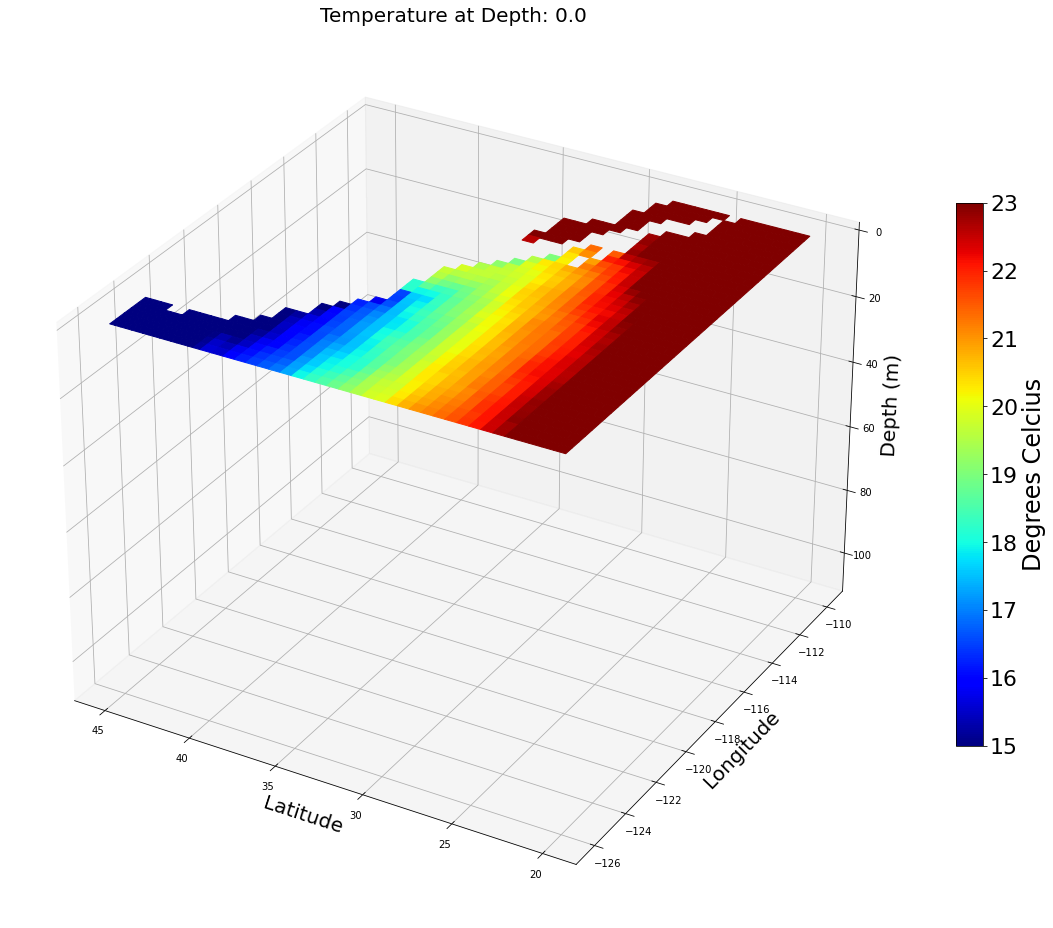

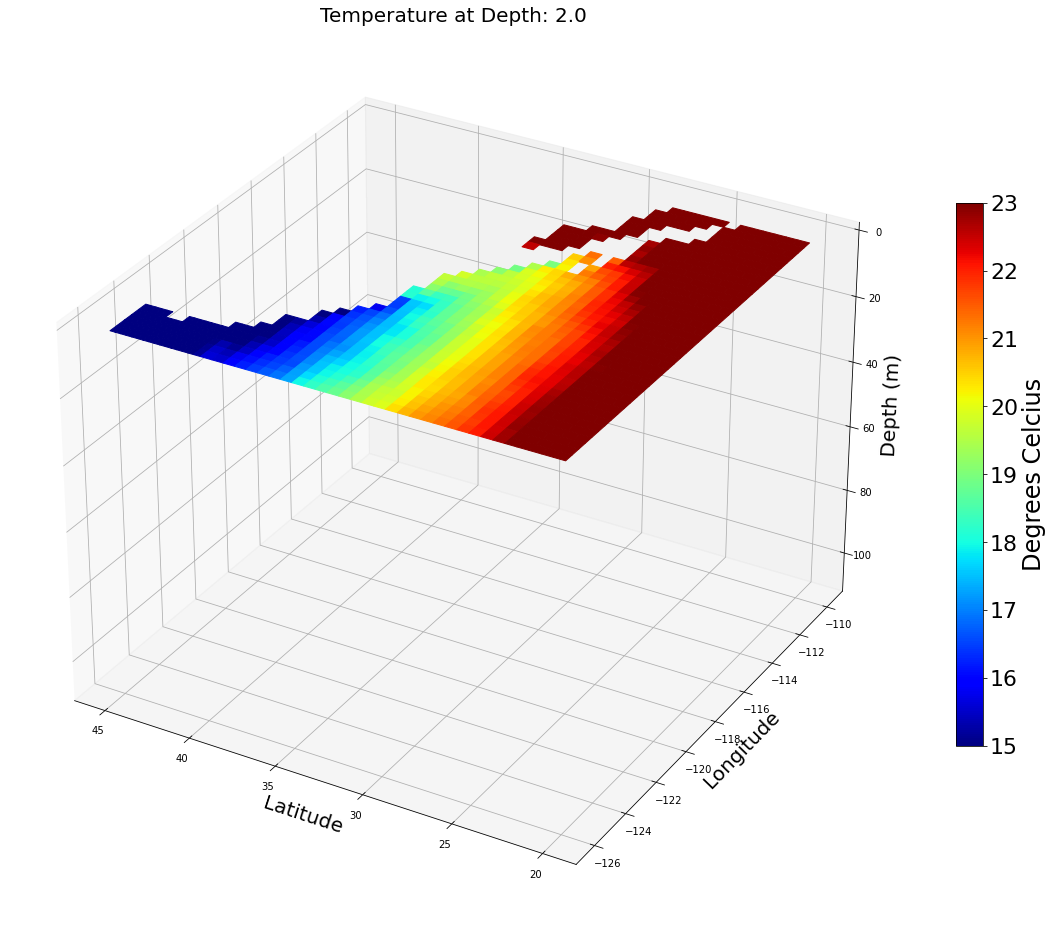

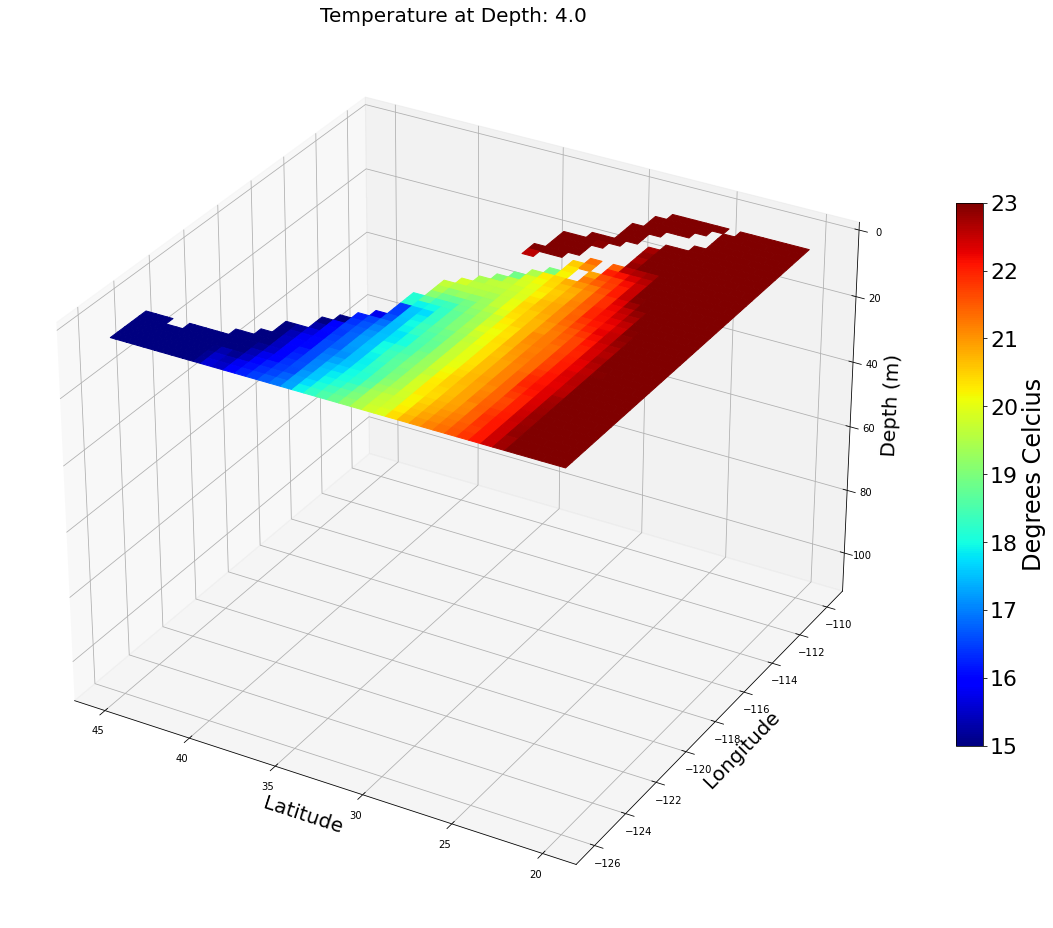

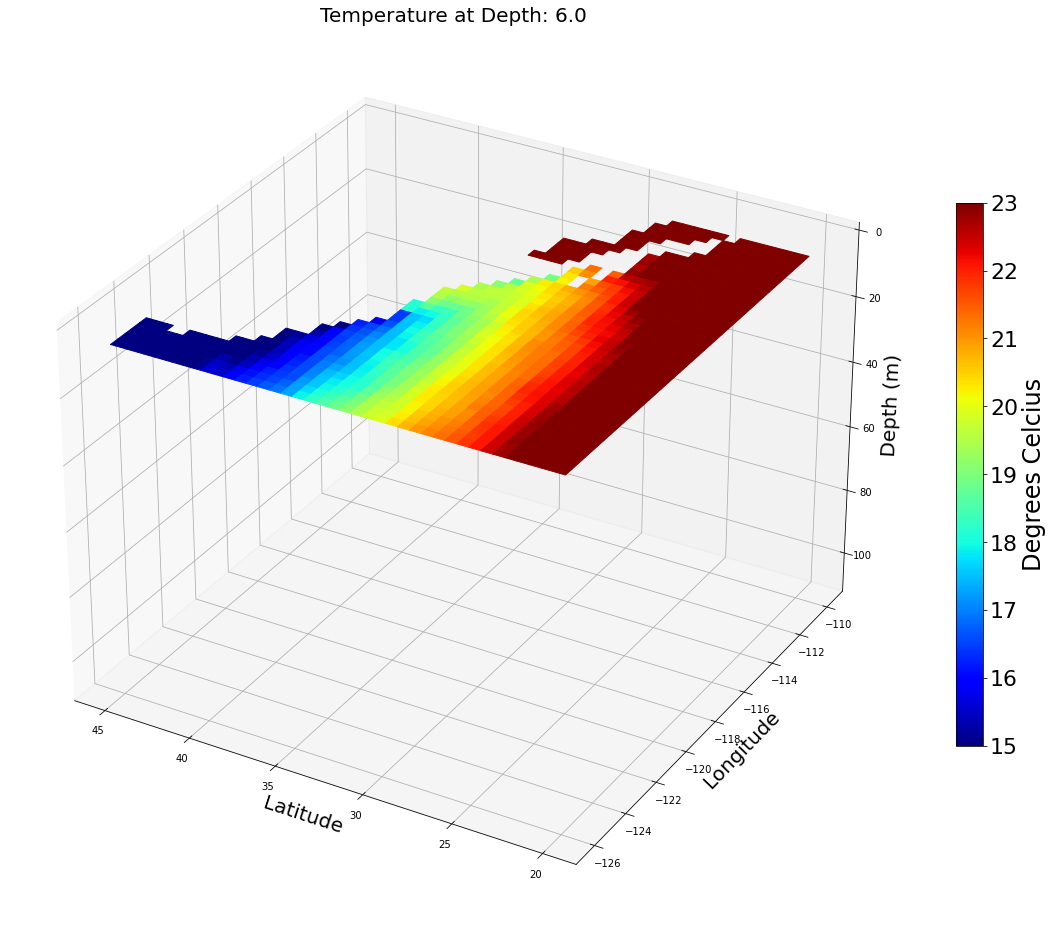

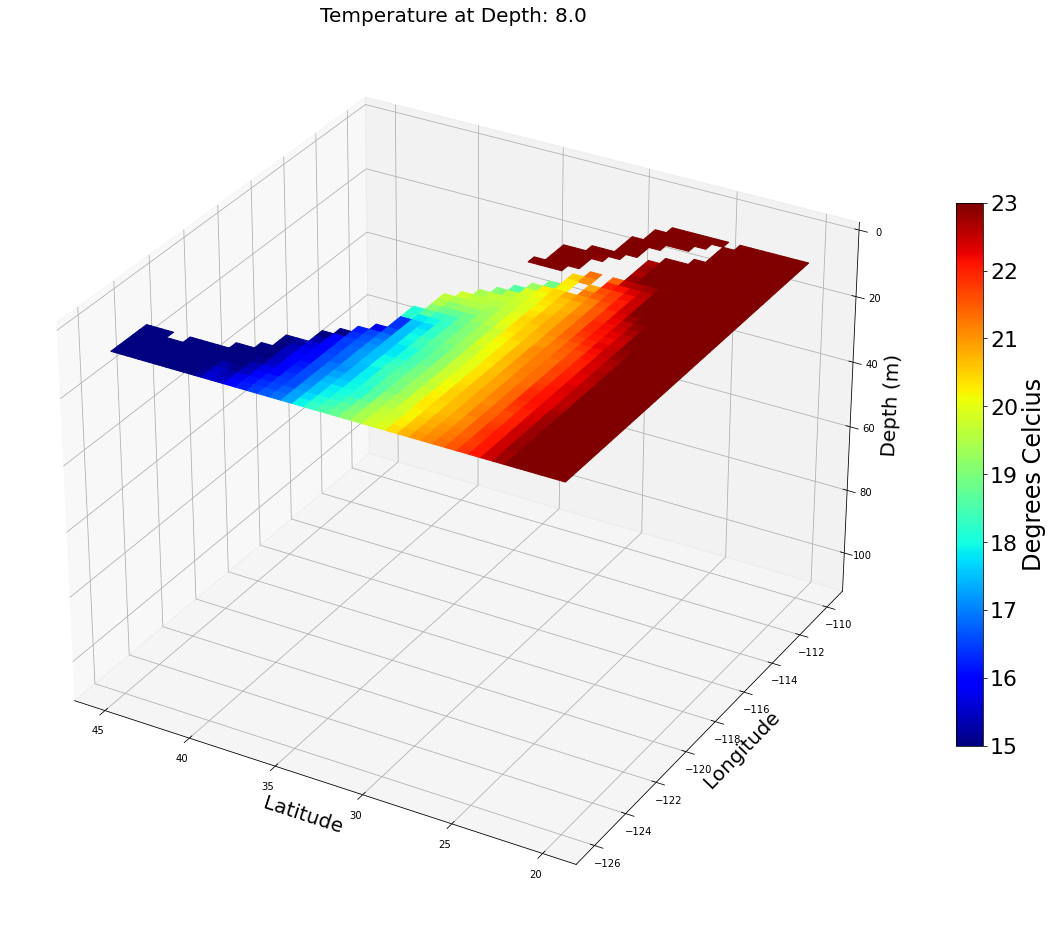

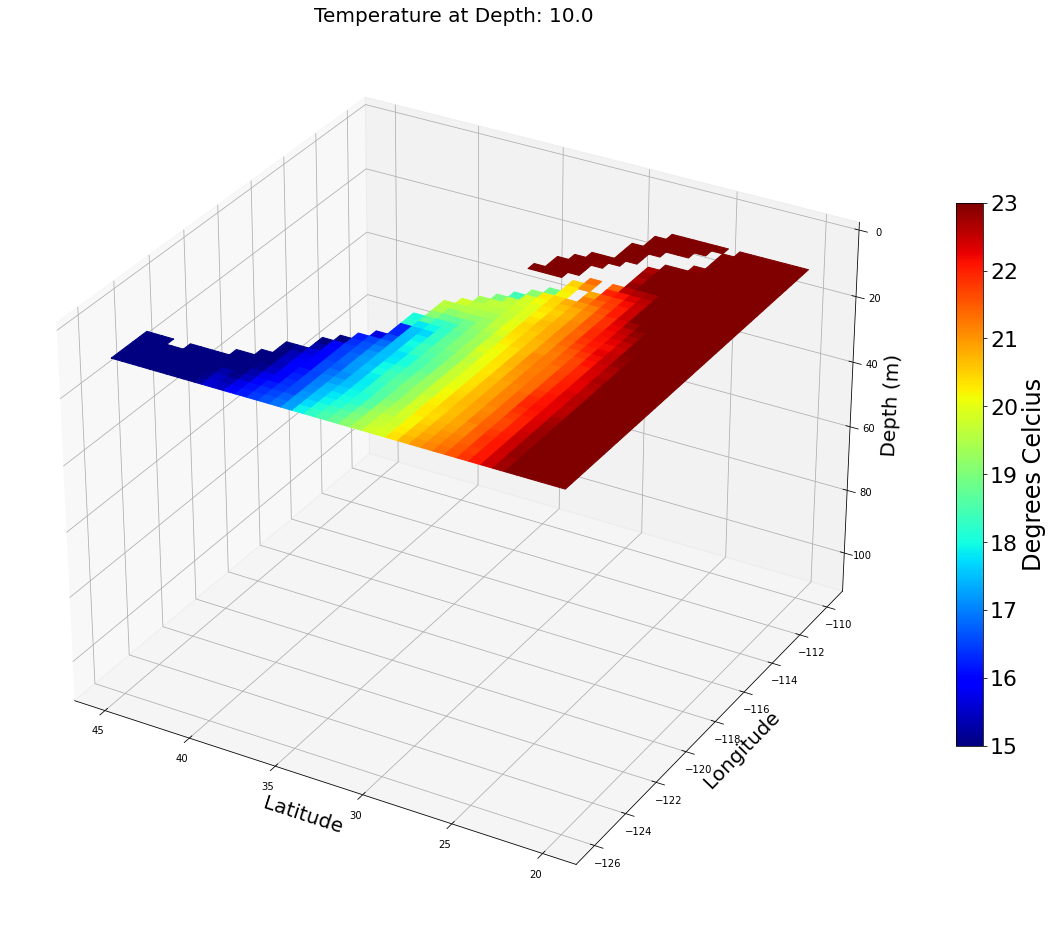

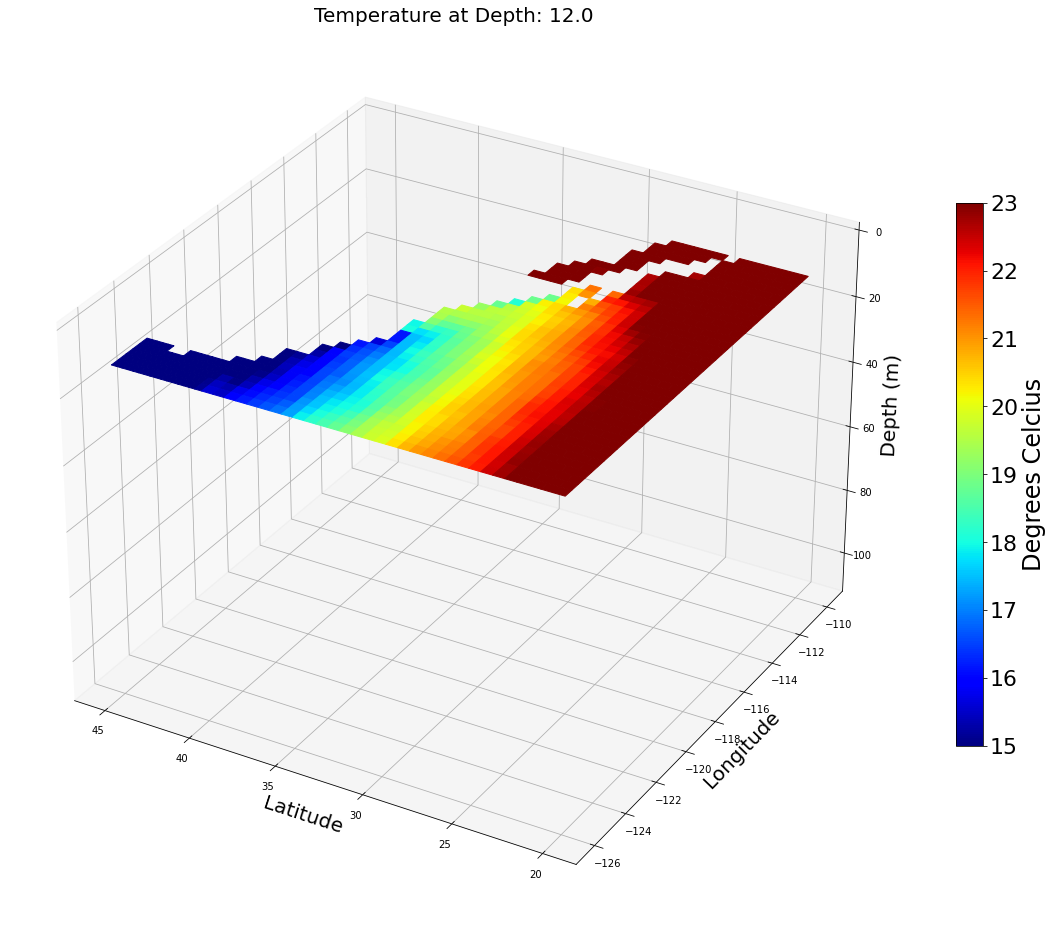

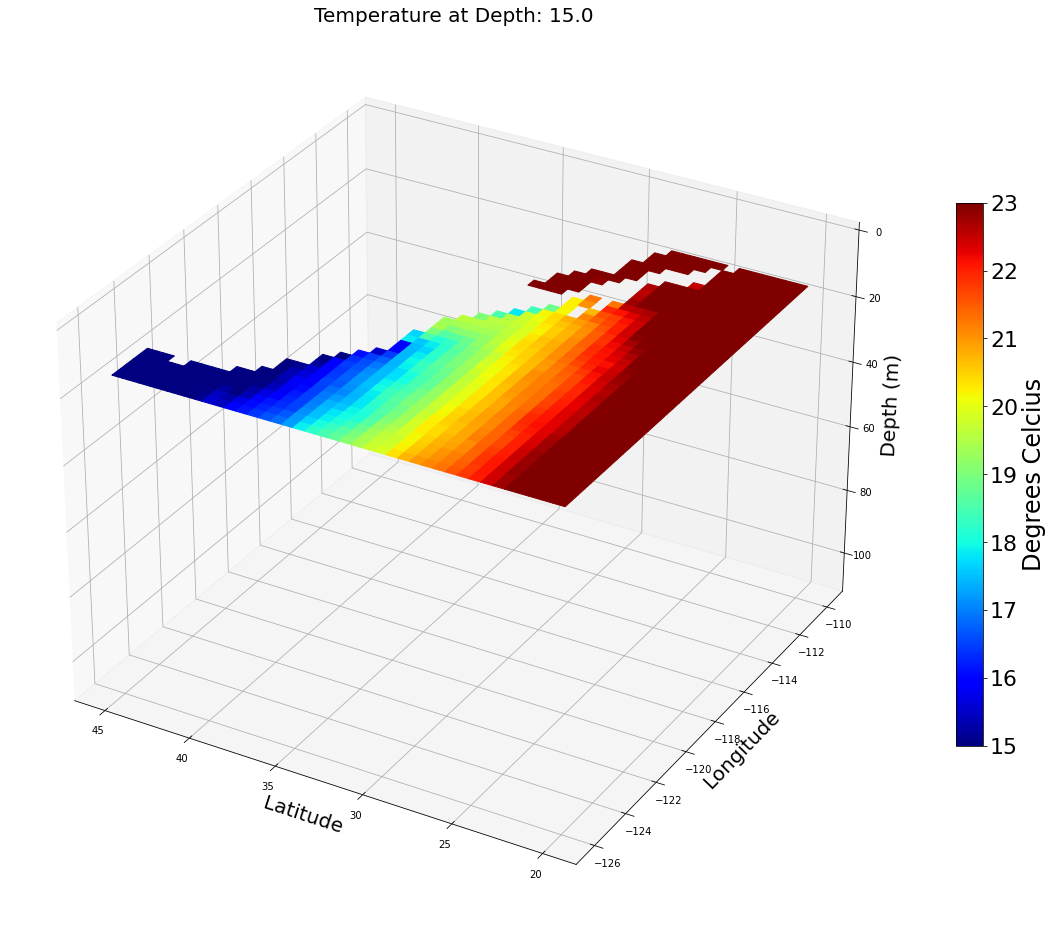

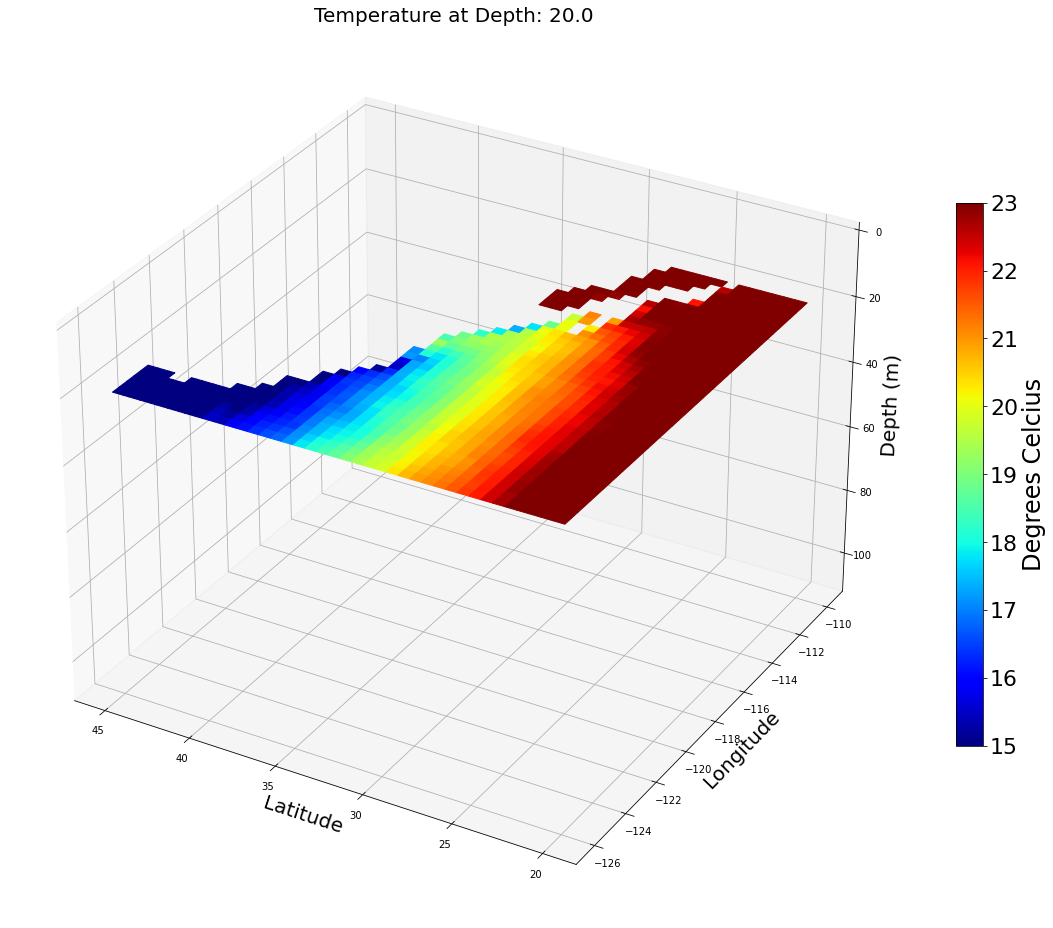

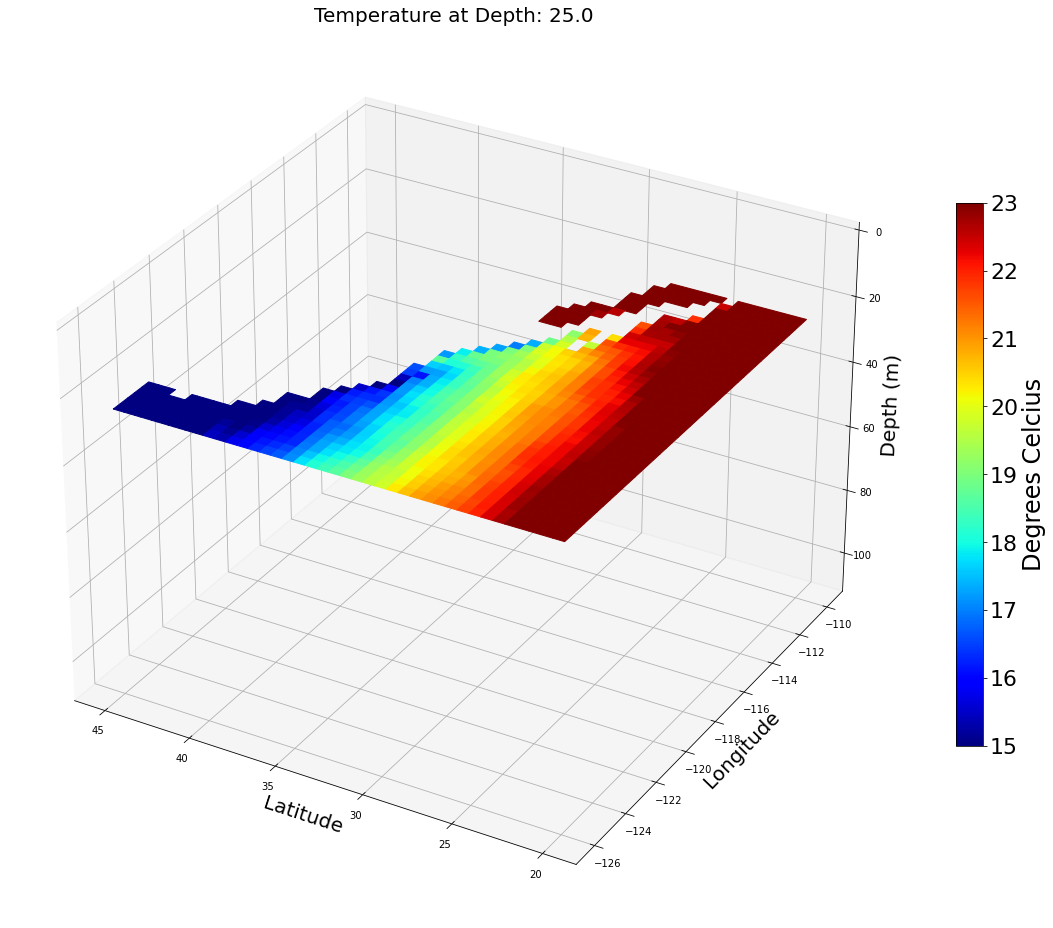

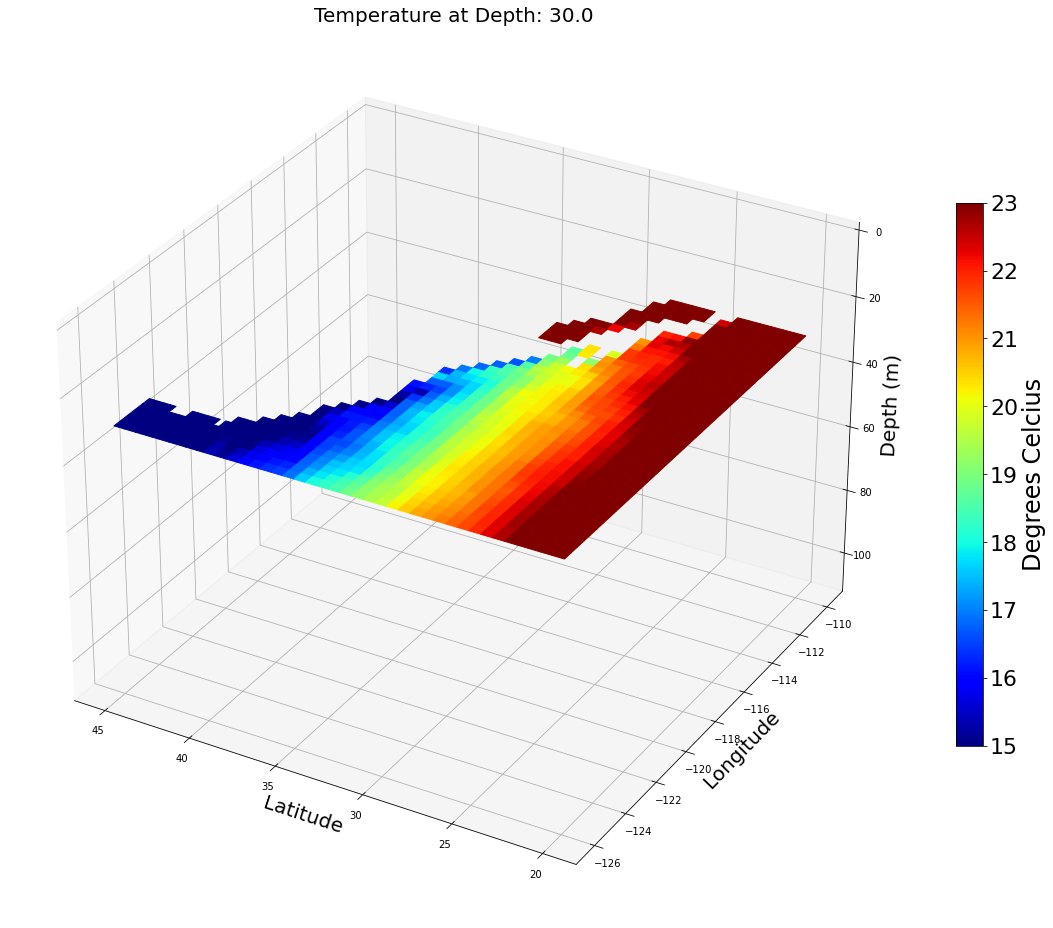

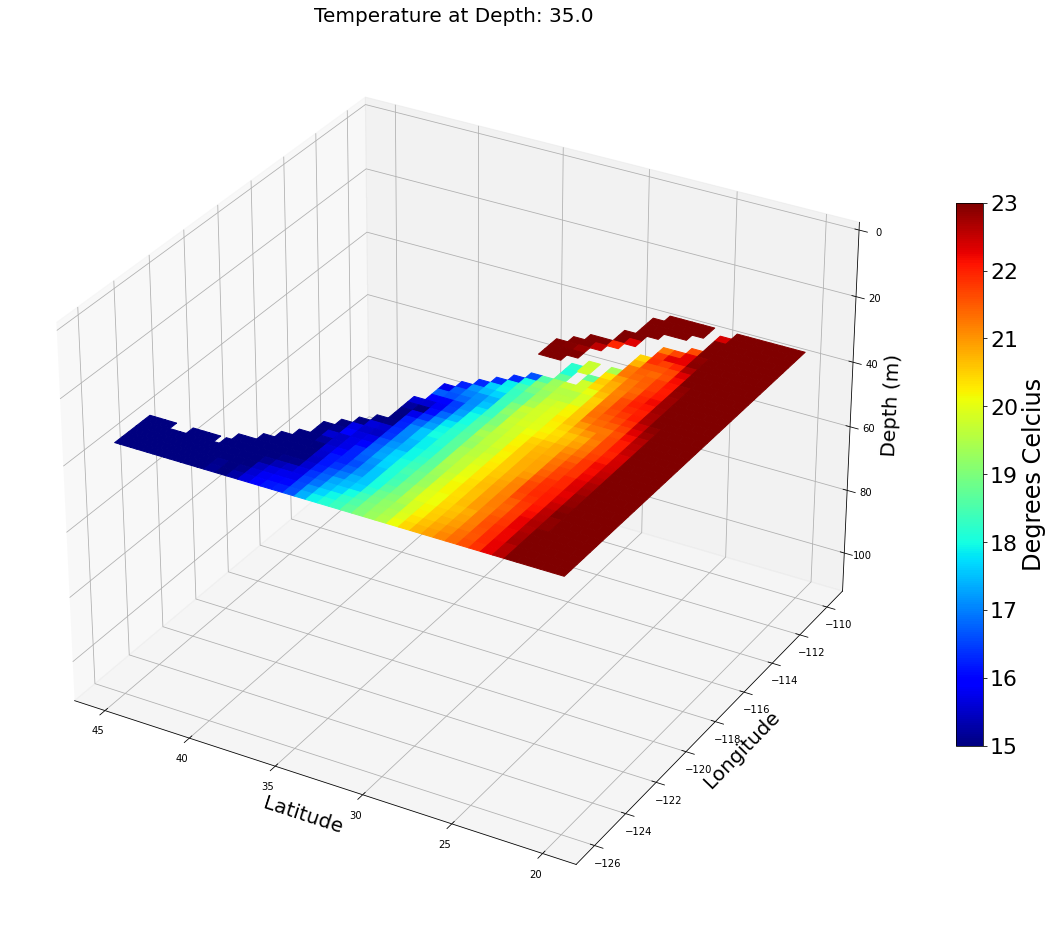

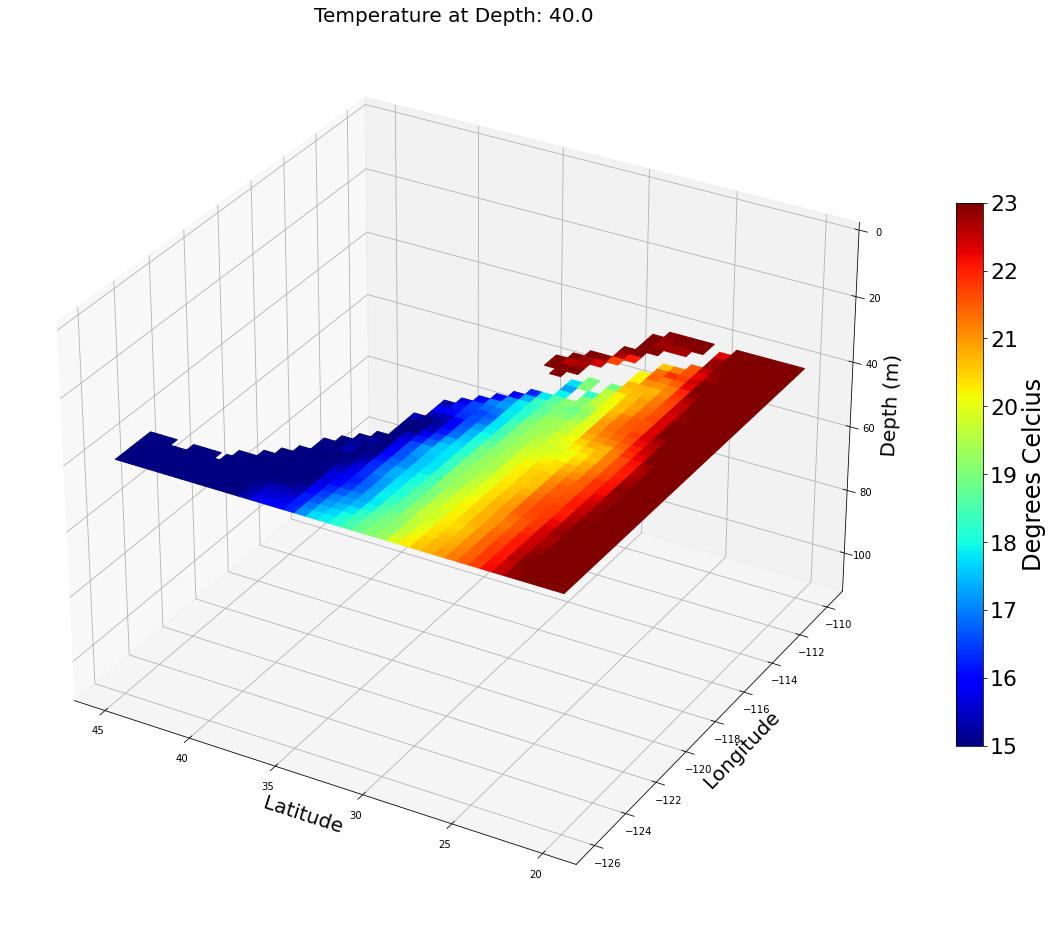

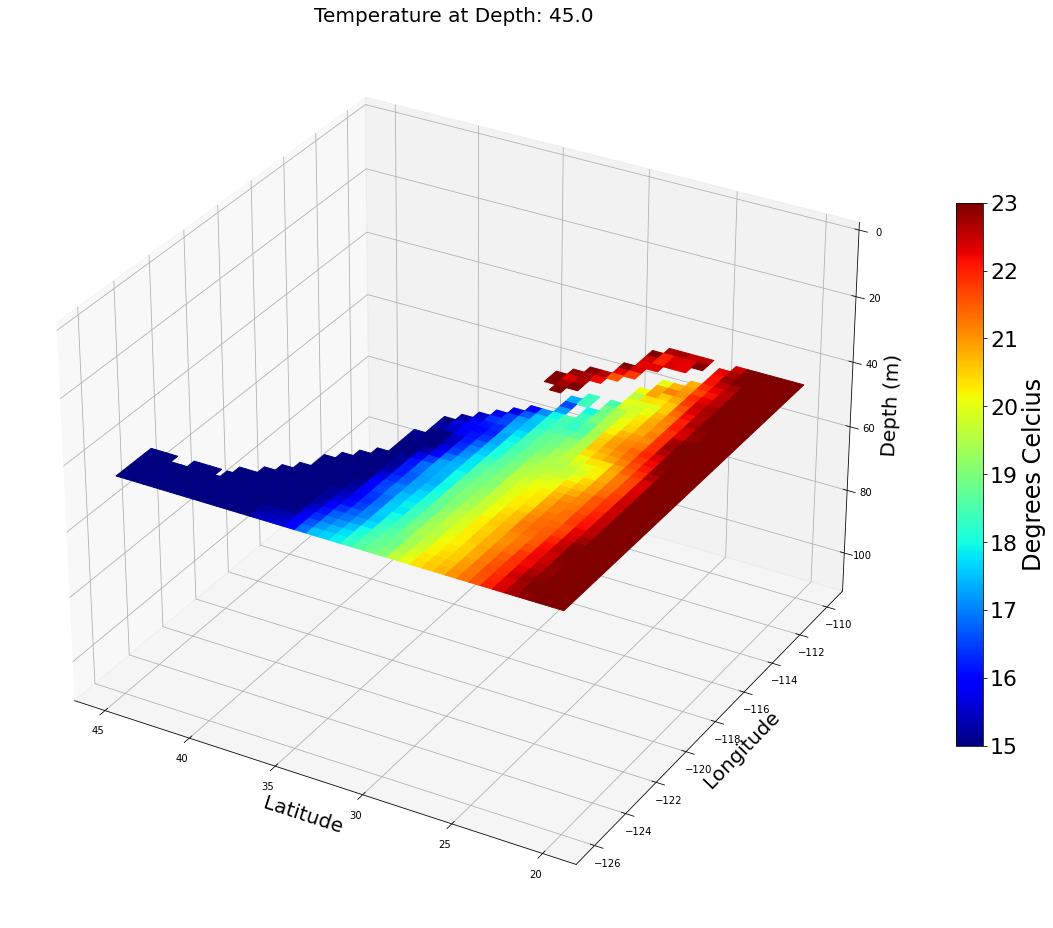

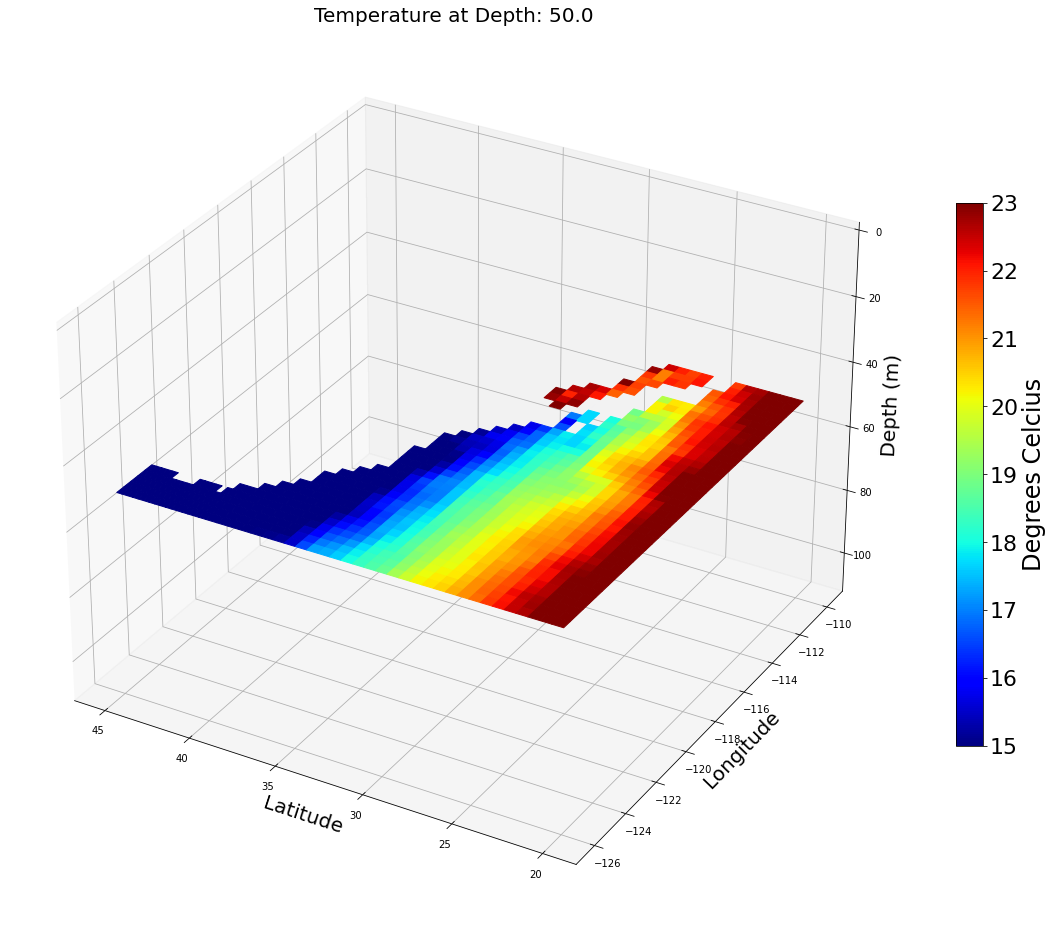

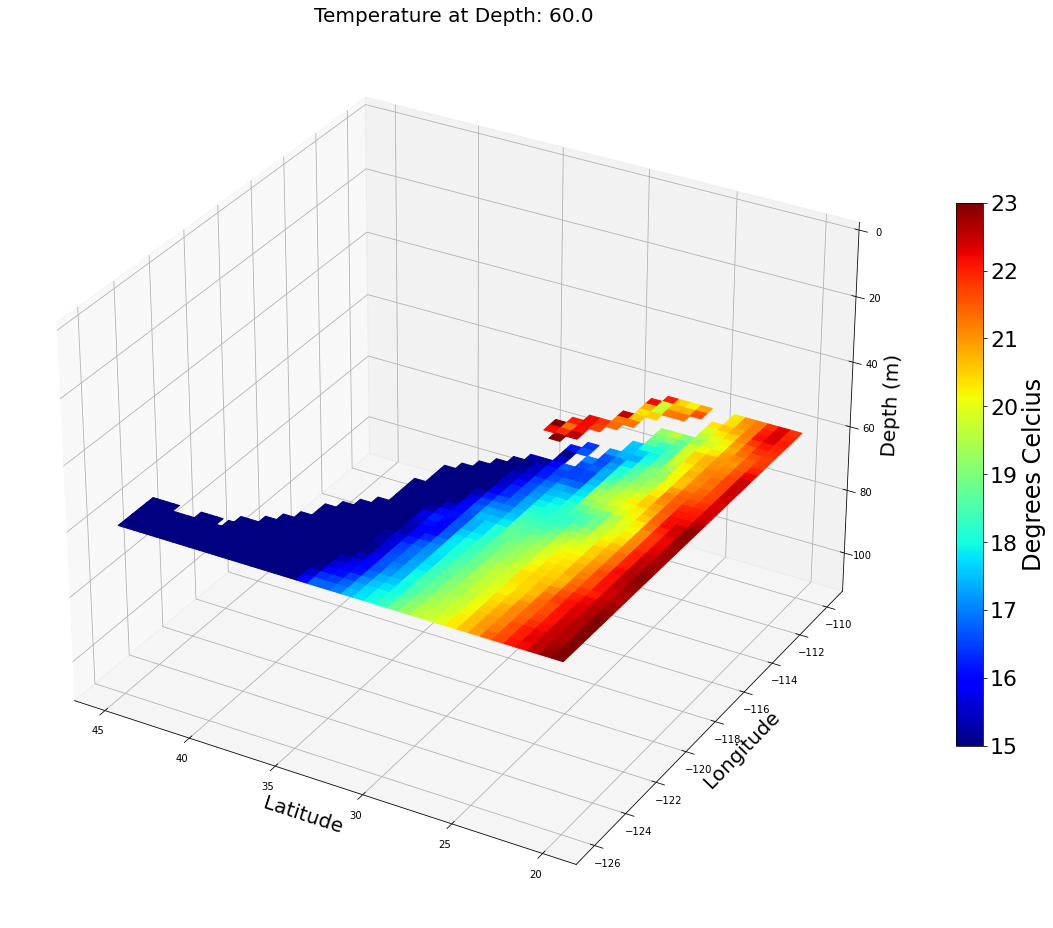

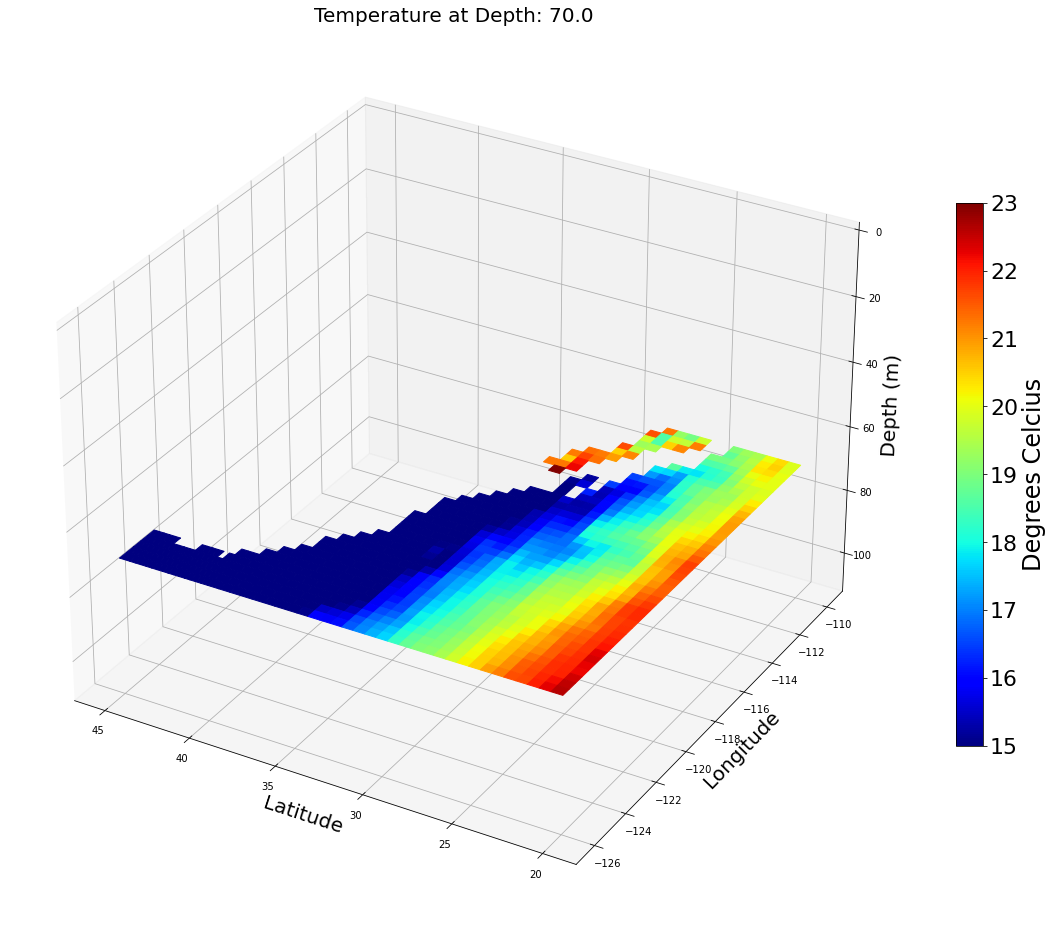

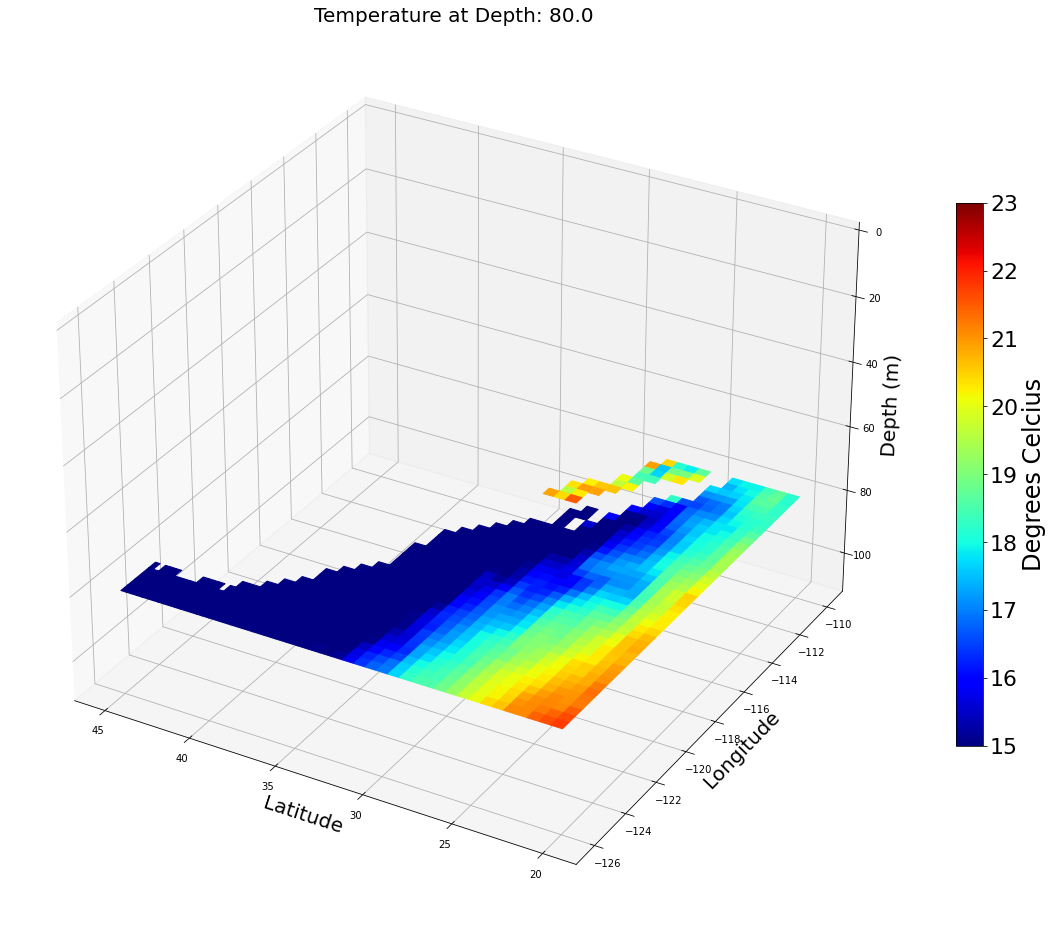

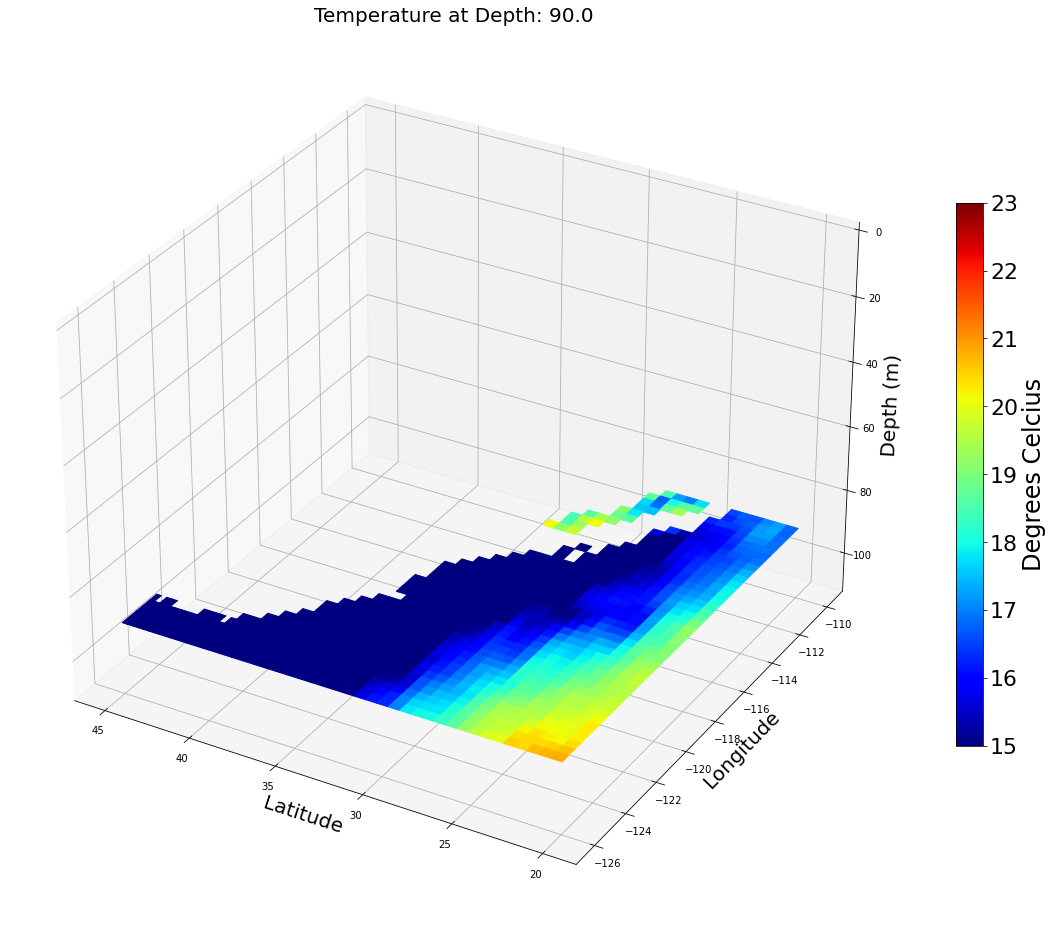

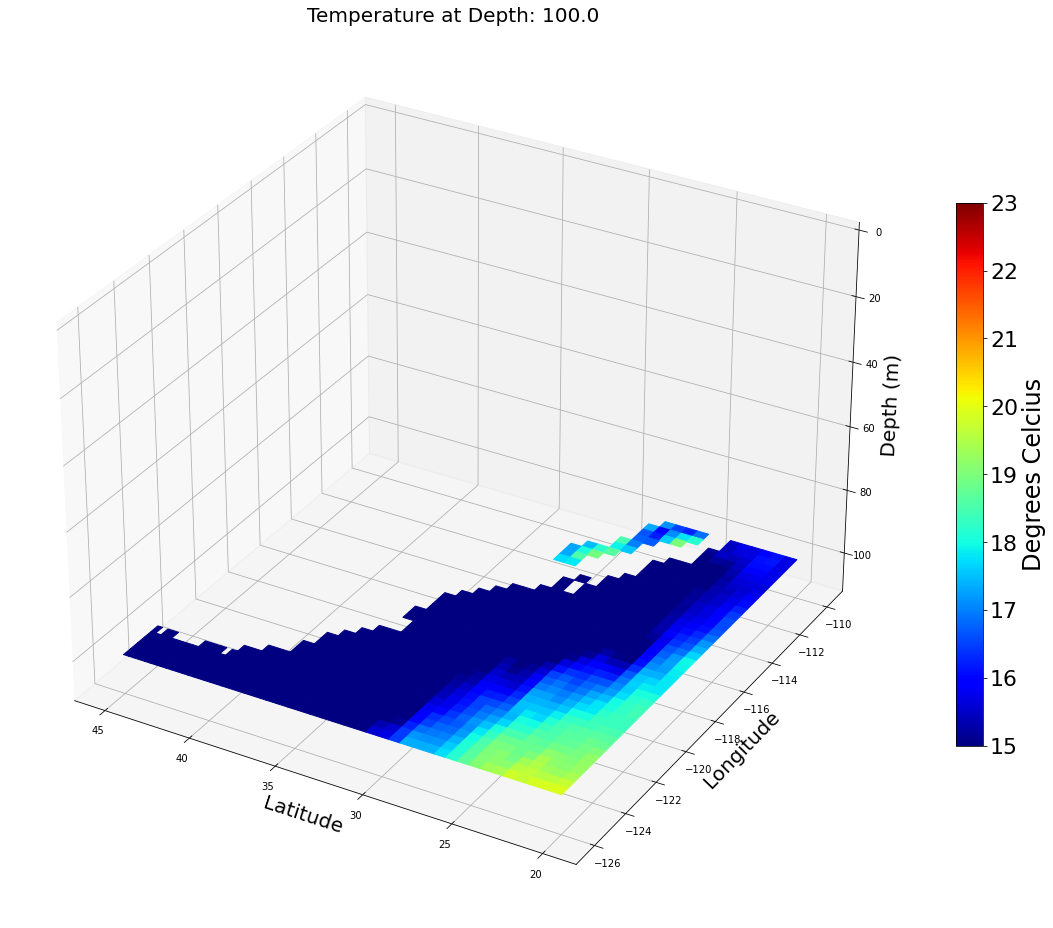

In [85]:
# Creating temperature maps
# Just for getting state lines 
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

temp_slice = average_2015[0]

# fig = plt.figure(figsize=[20,20])
# Depth_Plot = fig.add_subplot(1,1,1,projection='3d')

LAT, LON = np.meshgrid(lon, lat)

# colorbar = fig.colorbar(Depth_Colormesh, shrink=0.7, anchor=('SW'))
# colorbar.set_label('Degrees Celcius',fontsize=24)
# colorbar.ax.tick_params(labelsize=22)

for d in range(len(depth)):
    if depth[d] < 125:
        fig = plt.figure(figsize=[20,20])
        Depth_Plot = fig.add_subplot(1,1,1,projection='3d')
        
        Depth_Plot.set_title("Temperature at Depth: " + str(depth[d]), fontsize=20)
        
        Depth_Plot.set_xlabel('Latitude', fontsize=20)
        Depth_Plot.set_ylabel('Longitude', fontsize=20)
        Depth_Plot.set_zlabel('Depth (m)', fontsize=20)
        Depth_Plot.set_zlim(110, 0)
        Depth_Plot.invert_xaxis()

        cmap = plt.cm.jet
        depths = (LAT*0) + depth[d]
        norm = matplotlib.colors.Normalize(vmax=max_Temp, vmin=min_Temp)
        
        cb = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
        cb.set_array([])
        colorbar = fig.colorbar(cb, shrink=0.5)
        colorbar.set_label('Degrees Celcius',fontsize=24)
        colorbar.ax.tick_params(labelsize=22)
        

        colors = cmap(norm(temp_slice[d]))
        Depth_Colormesh = Depth_Plot.plot_surface(LON, LAT, depths, facecolors=colors, vmax=max_Temp, vmin=min_Temp, cmap='jet')
        #Depth_Colormesh = Depth_Plot.contour(LON, LAT, temp_slice.data[d], cmap='binary', linewidths = 2)  # Plot contour curves

        
        fig.savefig(r"C:\Users\David\OneDrive\Desktop\Depth Maps\2015\ " + str(depth[d])+ ".jpg", bbox_inches='tight')


In [84]:
average_2000

<xarray.DataArray 'water_temp' (time: 1, depth: 40, lat: 376, lon: 201)>
array([[[[22.034822 , 22.043407 , 22.06218  , ..., 25.184807 ,
          25.226738 , 25.275928 ],
         [22.00849  , 22.024754 , 22.040169 , ..., 25.128141 ,
          25.183811 , 25.228472 ],
         [21.996239 , 22.010544 , 22.019203 , ..., 25.082008 ,
          25.139612 , 25.187511 ],
         ...,
         [12.6755   , 12.692967 , 12.701341 , ...,        nan,
                 nan,        nan],
         [12.675133 , 12.69145  , 12.700974 , ...,        nan,
                 nan,        nan],
         [12.667659 , 12.682855 , 12.693822 , ...,        nan,
                 nan,        nan]],

        [[22.029724 , 22.041477 , 22.057055 , ..., 25.132538 ,
          25.180403 , 25.22447  ],
         [22.004778 , 22.020767 , 22.035116 , ..., 25.078869 ,
          25.13365  , 25.18259  ],
         [21.990643 , 22.006065 , 22.014387 , ..., 25.03083  ,
          25.089466 , 25.140364 ],
...
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T12:00:00
  * depth    (depth) float64 0.0 2.0 4.0 6.0 8.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat      (lat) float64 20.0 20.08 20.16 20.24 ... 44.88 44.92 44.96 45.0
  * lon      (lon) float64 -126.0 -125.9 -125.8 -125.8 ... -110.2 -110.1 -110.0

In [82]:
colors[:,:,0].shape

(376, 201)